In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import box, Point, LineString, Polygon, MultiPolygon
from shapely.wkt import loads
import folium

In [2]:
# leitura dos arquivos
pontodeonibus= gpd.read_file('data/paradas.shp')
linhas = gpd.read_file('data/Linhas.shp')

In [3]:
# Qual sistemas estamos?
# acessando o atributo crs
pontodeonibus.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
# Convertendo, paradas de onibus, de Sistema de coordenadas EPSG:31983 para EPSG:4326
parada = pontodeonibus.to_crs("EPSG:4326")
parada

,parada,descricao,situacao,estrutura_,tipo,geometry
0,6710,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76791 -15.91132)
1,6711,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76793 -15.91160)
2,6712,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76900 -15.91399)
3,6713,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76933 -15.91454)
4,6827,Residencial Vitoria,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76832 -15.90857)
...,...,...,...,...,...,...
5452,1163,NUCLEO RURAL RODEADOR - LADO OPOSTO ESCOLA ROD...,ATIVA,ACOSTAMENTO OU BAIA,Tipo C,POINT (-48.10282 -15.67575)
5453,1164,NUCLEO RURAL RODEADOR - EM FRENTE ESCOLA RODEA...,ATIVA,ACOSTAMENTO OU BAIA,Tipo C,POINT (-48.10322 -15.67570)
5454,1166,ANTES DA ENTRADA PARA A DF 445 NORTE - KM 7 DF...,ATIVA,SEM ESTRUTURA,Tipo C,POINT (-48.14080 -15.66765)
5455,1159,LADO OPOSTO A ENTRADA DA RADIOBRAS E DF 220 DF...,ATIVA,SEM ESTRUTURA,Habitual,POINT (-48.14358 -15.63395)


In [5]:
# Convertendo, linhas de onibus, de Sistema de coordenadas EPSG:31983 para EPSG:4326
rota = linhas.to_crs("EPSG:4326")
rota

,id,linha,nome,sentido,faixa_tari,tarifa,situacao,bacia,tipo_da_li,situacao_d,geometry
0,14832,0.018,PARANOÁ PARQUE / W3 NORTE (VIA PONTE JK),IDA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.78134 -15.76050, -47.78154 -15..."
1,14833,0.018,PARANOÁ PARQUE / W3 NORTE (VIA PONTE JK),VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.90742 -15.73629, -47.90757 -15..."
2,13249,100.2,Paranoá (Paranoá Parque) / Rodoviária do Plano...,VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.88207 -15.79409, -47.88201 -15..."
3,10696,0.946,Vicente Pires / Rodoviária do Plano Piloto (EIXO),IDA,METROPOLITANA 2,5.5,Ativa,5,Rodoviária,T,"LINESTRING (-48.05308 -15.79527, -48.05308 -15..."
4,15435,0.373,Samambaia Norte (2 Avenida) / Rodoviária do Pl...,IDA,METROPOLITANA 2,5.5,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15030 -15..."
...,...,...,...,...,...,...,...,...,...,...,...
1303,14091,372.5,Samambaia Norte (1ª Avenida) / Taguacenter,CIRCULAR,METROPOLITANA 1,3.8,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15127 -15..."
1304,13208,506.2,Sobradinho I-II / Catingueiro,VOLTA,RURAL 3,5.5,Ativa,6,Rodoviária,T,"LINESTRING (-47.94140 -15.54974, -47.94136 -15..."
1305,13209,506.2,Sobradinho I-II / Catingueiro,IDA,RURAL 3,5.5,Ativa,6,Rodoviária,T,"LINESTRING (-47.78577 -15.64976, -47.78599 -15..."
1306,14100,0.050,Samambaia Norte (QN 423-425) / Taguacenter (Sa...,CIRCULAR,METROPOLITANA 1,3.8,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15127 -15..."


In [6]:
# Escolhendo uma linestring de uma rota de onibus 
linestringFGA = rota[rota['linha']=='2205']
linestringFGA

,id,linha,nome,sentido,faixa_tari,tarifa,situacao,bacia,tipo_da_li,situacao_d,geometry
41,610,2205,Terminal de Integração do Gama / W3 Sul,VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.89107 -15.79567, -47.89121 -15..."
62,547,2205,Terminal de Integração do Gama / W3 Sul,IDA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-48.04935 -15.99204, -48.04873 -15..."


In [7]:
# Gera o mapa da região
mapa = folium.Map(location=list(reversed([-47.976167,-15.922460])), tiles="cartodbpositron", zoom_start = 11)

# Obter o objeto a partir da coluna
fga_volta = linestringFGA.geometry.iloc[0]
fga_ida = linestringFGA.geometry.iloc[1]

# Colocando as coordenadas no formato usado pelo folium (latitude, longitude)
coord_ida = [(lat1, lon1) for lon1,lat1 in fga_ida.coords]
coord_volta = [(lat2, lon2) for lon2,lat2 in fga_volta.coords]

# Plotando a ida
folium.PolyLine(locations = coord_ida, color = 'green', tooltip = linestringFGA['linha'].iloc[1]+ ' ' + linestringFGA['sentido'].iloc[1]).add_to(mapa)

#Plotando a volta
folium.PolyLine(locations = coord_volta, color = 'red', tooltip = linestringFGA['linha'].iloc[0]+ ' ' + linestringFGA['sentido'].iloc[0]).add_to(mapa)

# Mostrar o mapa
mapa

In [8]:
# Identificar todas as paradas de onibus (POINTs) contidas em uma rota (LineString)
fga_paradas = linestringFGA.geometry.iloc[0] 

# Função para aproximar as coordenadas para 3 casas decimais
def aproximar_coordenadas(coord):
    return round(coord, 3)

# Iterar sobre os pontos de paradas e verificar se estão contidos na Linestring
for idx, ponto_parada in parada.iterrows():
    ponto = ponto_parada["geometry"]
    ponto_aproximado = Point(aproximar_coordenadas(ponto.x), aproximar_coordenadas(ponto.y))
    linestring_aproximada = LineString([Point(aproximar_coordenadas(x), aproximar_coordenadas(y)) for x, y in fga_paradas.coords])
    if linestring_aproximada.contains(ponto_aproximado):
        print(f"O ponto de parada {ponto_parada['descricao']} está contido na Linestring.")


O ponto de parada APOS BALAO DO AEROPORTO EPDB / DF-025 está contido na Linestring.
O ponto de parada BRT Granja do Ipê está contido na Linestring.
O ponto de parada Em frente ao BRT Granja do Ipê está contido na Linestring.
O ponto de parada SMPW - Q.27 CONJ.03 LOTE 08 EPIA -DF 03 está contido na Linestring.
O ponto de parada SMPW - Q.27 CONJ 1 LOTE 6 - COND. ITACARE EPIA -DF 03 está contido na Linestring.
O ponto de parada BRT Catetinho está contido na Linestring.
O ponto de parada BRT Catetinho está contido na Linestring.
O ponto de parada APOS ENTRADA DA RODOVIA SENTIDO BR 040/ DF 065 KM 0 DF 065 está contido na Linestring.
O ponto de parada ANTES SAIDA PARA A RODOVIA SENTIDO DF 065/ BR 040 DF 065 está contido na Linestring.
O ponto de parada SMPW - Q.27 CONJ.03 LOTE 03 - RESERVATORIO DA CAESB EPIA -DF 03 está contido na Linestring.
O ponto de parada SMPW QD. 14 ENTRE CONJ. 1E 2 EPDB / DF-025 está contido na Linestring.
O ponto de parada SMPW LADO OPOSTA QD. 14 ENTRE CONJ. 1E 2 EPD

In [9]:
# Plotar TODAS as paradas de onibus de uma rota

# Lista para armazenar as paradas encontradas
paradas_encontradas = []

# Iterar sobre os pontos de paradas e verificar se estão contidos na Linestring
for idx, ponto_parada in parada.iterrows():
    ponto = ponto_parada["geometry"]
    ponto_aproximado = Point(aproximar_coordenadas(ponto.x), aproximar_coordenadas(ponto.y))
    linestring_aproximada = LineString([Point(aproximar_coordenadas(x), aproximar_coordenadas(y)) for x, y in fga_paradas.coords])
    if linestring_aproximada.contains(ponto_aproximado):
        paradas_encontradas.append(ponto_parada)

# Criar um novo GeoDataFrame com as paradas encontradas
gdf_paradas_encontradas = gpd.GeoDataFrame(paradas_encontradas, crs='EPSG:4326')

for idx, ponto_parada in gdf_paradas_encontradas.iterrows():
    lat, lon = ponto_parada["geometry"].y, ponto_parada["geometry"].x
    folium.Marker([lat, lon], popup=ponto_parada['descricao']).add_to(mapa)

mapa

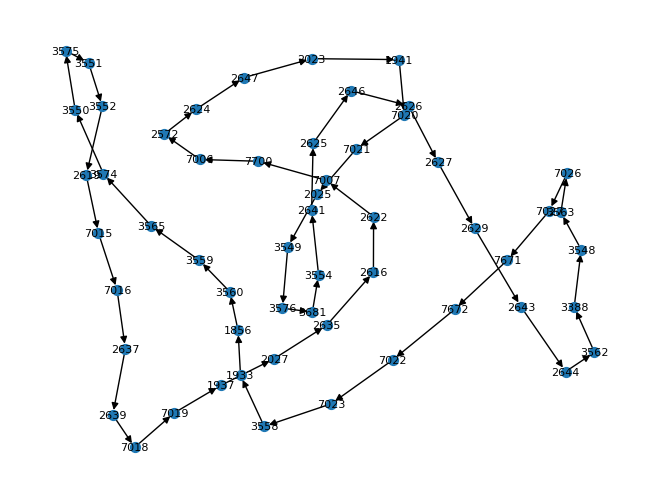

In [10]:
# Grafo direcional contendo rota

# Função para calcular a distância euclidiana entre dois pontos
def distance_between_points(origem, destino):
    return origem.distance(destino)

# Grafo vazio
grafo = nx.DiGraph()

# Adicionar nós ao grafo
for idx, row in gdf_paradas_encontradas.iterrows():
    grafo.add_node(row['parada'], pos=row['geometry'], id_rota='Gama')

# Adicionar arestas orientadas entre os nós
num_paradas = len(gdf_paradas_encontradas)
for i in range(num_paradas):
    # Obter as coordenadas de origem e destino
    origem = gdf_paradas_encontradas.iloc[i]['parada']
    destino = gdf_paradas_encontradas.iloc[(i + 1) % num_paradas]['parada']

    origem_coords = grafo.nodes[origem]['pos']
    destino_coords = grafo.nodes[destino]['pos']

    # Calcular a distância entre as paradas
    distancia = distance_between_points(origem_coords, destino_coords)

    # Adicionar aresta orientada
    grafo.add_edge(origem, destino, distancia=distancia)

# Obter as posições dos nós usando o layout padrão do NetworkX
pos = nx.spring_layout(grafo, seed=42)

# Desenhar o grafo
nx.draw(grafo, pos, with_labels=True, node_size=50, font_size=8)


# Mostrar o desenho do grafo
plt.show()

In [11]:
# Para unir dois grafos é necessário primeiro de uma nova rota

# Rota Santa Maria
linestringSantaMaria= rota[rota['linha']=='2306']

# Obter o objeto a partir da coluna
SantaMaria_volta = linestringSantaMaria.geometry.iloc[1]
SantaMaria_ida = linestringSantaMaria.geometry.iloc[0]

# Colocando as coordenadas no formato usado pelo folium (latitude, longitude)
coord_ida1 = [(lat1, lon1) for lon1,lat1 in SantaMaria_ida.coords]
coord_volta1 = [(lat2, lon2) for lon2,lat2 in SantaMaria_volta.coords]

# Definindo um ponto de inicio

mapa1 = folium.Map(location=list(reversed([-47.976167,-15.922460])), tiles="cartodbpositron", zoom_start = 11)

# Plotando a ida
folium.PolyLine(locations = coord_ida1, color = 'blue', tooltip = linestringSantaMaria['linha'].iloc[0]+ ' ' + linestringSantaMaria['sentido'].iloc[0]).add_to(mapa1)

#Plotando a volta
folium.PolyLine(locations = coord_volta1, color = 'yellow', tooltip = linestringSantaMaria['linha'].iloc[1]+ ' ' + linestringSantaMaria['sentido'].iloc[1]).add_to(mapa1)

# Identificar todas as paradas de onibus (POINTs) contidas em uma rota (LineString)
SantaMaria_paradas = linestringSantaMaria.geometry.iloc[0] 

# Plotar TODAS as paradas de onibus de uma rota

# Função para aproximar as coordenadas para 3 casas decimais
def aproximar_coordenadas(coord):
    return round(coord, 3)

# Lista para armazenar as paradas encontradas
paradas_encontradas1 = []

# Iterar sobre os pontos de paradas e verificar se estão contidos na Linestring
for idx, ponto_parada in parada.iterrows():
    ponto = ponto_parada["geometry"]
    ponto_aproximado = Point(aproximar_coordenadas(ponto.x), aproximar_coordenadas(ponto.y))
    linestring_aproximada = LineString([Point(aproximar_coordenadas(x), aproximar_coordenadas(y)) for x, y in SantaMaria_paradas.coords])
    if linestring_aproximada.contains(ponto_aproximado):
        paradas_encontradas1.append(ponto_parada)

# Criar um novo GeoDataFrame com as paradas encontradas
gdf_paradas_encontradas1 = gpd.GeoDataFrame(paradas_encontradas1, crs='EPSG:4326')

for idx, ponto_parada in gdf_paradas_encontradas1.iterrows():
    lat, lon = ponto_parada["geometry"].y, ponto_parada["geometry"].x
    folium.Marker([lat, lon], popup=ponto_parada['descricao']).add_to(mapa1)

mapa1


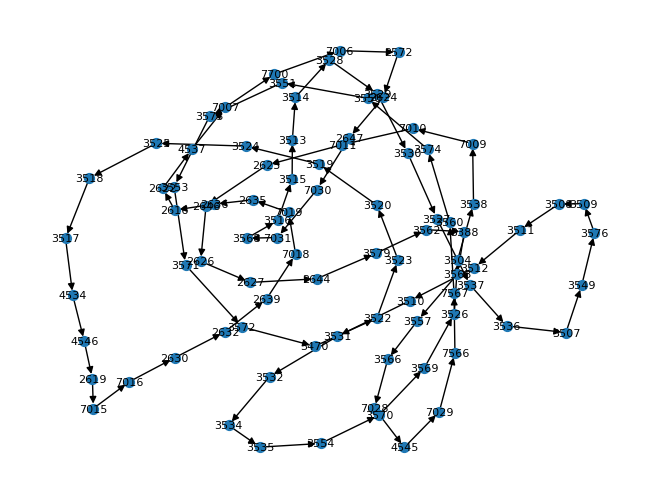

In [12]:
def distance_between_points(origem, destino):
    return origem.distance(destino)

# grafo da rota
grafo1 = nx.DiGraph()

# Adicionar nós ao grafo
for idx, row in gdf_paradas_encontradas1.iterrows():
    grafo1.add_node(row['parada'], pos=row['geometry'], id_rota='SantaMaria')


# Adicionar arestas orientadas entre os nós
num_paradas1 = len(gdf_paradas_encontradas1)
for i in range(num_paradas1):
    # Obter as coordenadas de origem e destino
    origem1 = gdf_paradas_encontradas1.iloc[i]['parada']
    destino1 = gdf_paradas_encontradas1.iloc[(i + 1) % num_paradas1]['parada']

    origem_coords1 = grafo1.nodes[origem1]['pos']
    destino_coords1 = grafo1.nodes[destino1]['pos']

    # Calcular a distância entre as paradas
    distancia1 = distance_between_points(origem_coords1, destino_coords1)

    # Adicionar aresta orientada
    grafo1.add_edge(origem1, destino1, distancia=distancia1)

# Obter as posições dos nós usando o layout padrão do NetworkX
pos1 = nx.spring_layout(grafo1, seed=42)

# Desenhar o grafo
nx.draw(grafo1, pos1, with_labels=True, node_size=50, font_size=8)


# Mostrar o desenho do grafo
plt.show()

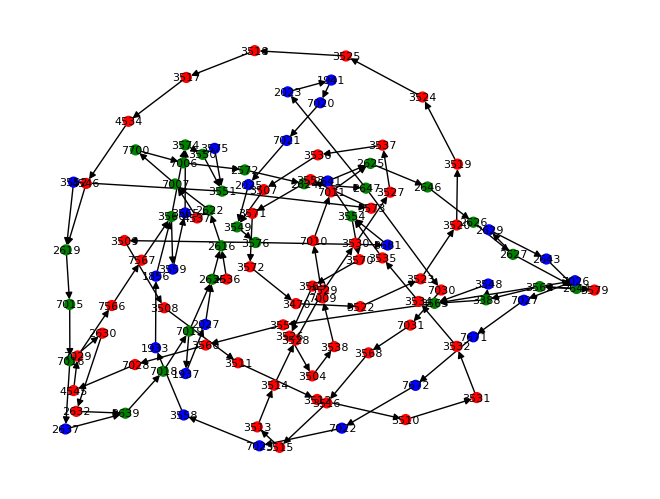

In [13]:
# Unindo Rotas
grafo_combinado =nx.compose(grafo, grafo1)

# Identificar os nós em comum entre as rotas após unir os grafos
nos_em_comum = set(grafo.nodes).intersection(grafo1.nodes)

# Definir uma cor única para os nós em comum
cor_nos_em_comum = 'green'

# Criar um dicionário de cores para os nós com base no id_rota
cores_rotas = {'Gama': 'blue', 'SantaMaria': 'red'}

# Obter as posições dos nós usando o layout padrão do NetworkX
pos_combinado = nx.spring_layout(grafo_combinado, seed=42)

# Criar uma lista de cores para os nós
cores_node = []
for node in grafo_combinado.nodes:
    if node in nos_em_comum:
        # Nó em comum entre as rotas
        cores_node.append(cor_nos_em_comum)
    else:
        # Nó de uma das rotas distintas
        id_rota = grafo_combinado.nodes[node]['id_rota']
        cores_node.append(cores_rotas[id_rota])

# Desenhar o grafo com cores diferentes para diferentes rotas e uma cor para os nós em comum
nx.draw(grafo_combinado, pos_combinado, with_labels=True, node_size=50, font_size=8, node_color=cores_node)

# Grafo combinado
plt.show()

<AxesSubplot:>

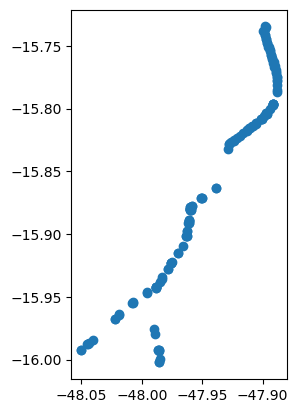

In [14]:
# Usando o GeoDataFrame para concatenar os grafos
gdf_list= [gdf_paradas_encontradas,gdf_paradas_encontradas1]
gdf_paradas = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs='EPSG:4326')

gdf_paradas.plot()

<AxesSubplot:>

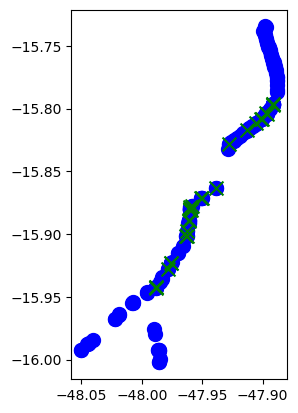

In [15]:
# Mostrando quais pontos aparecem em ambos
# Encontrando a interseção entre os dois GeoDataFrames
intersecao = gdf_paradas_encontradas.intersection(gdf_paradas_encontradas1.unary_union)

# Criando um novo GeoDataFrame com a interseção
gdf_intersecao = gpd.GeoDataFrame(geometry=intersecao, crs=gdf_paradas_encontradas.crs)

# Plotando o grafo de todas as paradas e daquelas que fazem intersecão
grafo_intersecao = gdf_paradas.plot(marker = 'o', color = 'blue', markersize = 100, label = 'Paradas')
gdf_intersecao.plot(marker = 'x', color = 'green', markersize = 100, label = 'Interseção', ax = grafo_intersecao)
grafo_intersecao